# DS Term 2 - Projects

# Customer Analytics - by Jayachandran, Group 3

# Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import re ## it used to work on String
import nltk # text mining
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tweepy, csv
from textblob import TextBlob
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import re
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
stop = stopwords.words('english')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [2]:
#session establishement requisits
session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('http://', adapter)
session.mount('https://', adapter)

# Amazon analytics

In [18]:
#establish the http session for Amazon twitter hanlder
session.get('https://twitter.com/amazonin')

#define functions for twitter API access with 4 keys
#define functions for entering search term, tweets count
#save the text file into the drive as csv format

class SentimentAnalysis:

    def _init_(self):
        self.tweets = []
        self.tweetText = []

    def get_tweets(self):
        # authenticating    
        access_Token = "1350044109298405376-52CVQZ4GErdrZAghq0XJ3yZDao87sn"
        access_Token_secret = "SM9eixJDTdJlc42ggQkAdCnreHD9R5oS1yhtyDUtmTBsP"
        consumer_key = "PmA42ovQaEfjeMk6W22GdxhUv"
        consumer_secret = "e7f65xihnRNST0nYqfgMKXmmdqo5ZS1FWvOYI3IQCpqA67q15h"
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_Token, access_Token_secret)
        api = tweepy.API(auth,wait_on_rate_limit=True)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))
        
        print("\n\n")

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)
      
        # Open/create a file to append data to
        csvFile = open('amazonindia_tweets.csv', 'a')

        #Use csv writer
        csvWriter = csv.writer(csvFile)

        for tweet in tweepy.Cursor(api.search,
                           q = searchTerm,
                           lang = "en").items(NoOfTerms):

        # Write a row to the CSV file. I use encode UTF-8
            csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
            print(tweet.created_at, tweet.text)
            
        csvFile.close()


if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.get_tweets()

Enter Keyword/Tag to search about: amazon
Enter how many tweets to search: 10



2021-02-15 09:48:08 Marc Jacobs Perfume, $52.92!

 #Deal

 https://t.co/d76kRZ6lzQ https://t.co/SOcX8VJyvD
2021-02-15 09:48:05 #NowPlaying Missy Elliott - Cool Off | Listen Live On https://t.co/l3b9TpMY0l. Stream Our 'New Release of The Week'… https://t.co/We5NpVdIC4
2021-02-15 09:48:05 Dash Cam for $32!!
-coupon on page

https://t.co/TOe1x1q1WM https://t.co/ZcSbE2xSdD
2021-02-15 09:48:03 Demon's Souls #publi
❌ Antes 79.95€
📉 Oferta 63.99€ 
https://t.co/GdQ8CPthwQ https://t.co/UcvyFLn6C9
2021-02-15 09:48:02 14 leadership principles that Jeff Bezos established at Amazon by Business Insider https://t.co/QUTw43PqHc
2021-02-15 09:48:02 Marc Jacobs Perfume, $52.92!

https://t.co/d1eQR3Bq2J https://t.co/a9bzR56s7W
2021-02-15 09:48:02 #OnAir: Lonely Oak radio - At LOR we only play indie music, -#LonelyOakradio- Listen now - For more info visit https://t.co/QqKVvvhNGl
2021-02-15 09:48:01 RT @brightcompareuk: £100 

In [15]:
#open the csv file containing amazon tweets
tweet_amazon = pd.read_csv(r"amazonindia_tweets.csv",header=None)

In [16]:
tweet_amazon.shape

(4495, 2)

In [4]:
#view the file
tweet_amazon.head()

,0,1
0,2021-01-15 16:52:41,b'RT @toposant55: I played this interesting Qu...
1,2021-01-15 16:51:50,b'Thanks for this quiz @amazonIN \n#AmazonSpin...
2,2021-01-15 16:49:41,b'I played this interesting Quiz on Amazon-Pla...
3,2021-01-15 16:48:21,b'@AmazonHelp @amazon @amazonIN @JeffBezos @aa...
4,2021-01-15 16:48:01,b'RT @amazonIN: Welcome the latest appliances ...


In [5]:
#replace column names
tweet_amazon.columns = ['timestamp','tweet']

In [6]:
tweet_amazon.head()

,timestamp,tweet
0,2021-01-15 16:52:41,b'RT @toposant55: I played this interesting Qu...
1,2021-01-15 16:51:50,b'Thanks for this quiz @amazonIN \n#AmazonSpin...
2,2021-01-15 16:49:41,b'I played this interesting Quiz on Amazon-Pla...
3,2021-01-15 16:48:21,b'@AmazonHelp @amazon @amazonIN @JeffBezos @aa...
4,2021-01-15 16:48:01,b'RT @amazonIN: Welcome the latest appliances ...


In [7]:
tweet_amazon.shape

(4478, 2)

In [8]:
tweet_amazon.head(10)

,timestamp,tweet
0,2021-01-15 16:52:41,b'RT @toposant55: I played this interesting Qu...
1,2021-01-15 16:51:50,b'Thanks for this quiz @amazonIN \n#AmazonSpin...
2,2021-01-15 16:49:41,b'I played this interesting Quiz on Amazon-Pla...
3,2021-01-15 16:48:21,b'@AmazonHelp @amazon @amazonIN @JeffBezos @aa...
4,2021-01-15 16:48:01,b'RT @amazonIN: Welcome the latest appliances ...
5,2021-01-15 16:57:11,b'The Silver and the Green (The Chronicles of ...
6,2021-01-15 16:57:10,b'Check out Furniture Hub Garden Bench Garden ...
7,2021-01-15 16:57:03,b'RT @NamitaA47414821: IFB Fack company fack w...
8,2021-01-15 16:56:58,b'IFB Fack company fack working #IFBAppliances...
9,2021-01-15 16:56:55,b'A Whisper Among the Trees: A Black Boy\xe2\x...


In [9]:
#removing special characters from tweets
tweet_amazon['preprocess_tweet_am'] = tweet_amazon['tweet'].str.replace("[^a-zA-Z]+", " ")

C:\Users\vcjayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [10]:
tweet_amazon.head()

,timestamp,tweet,preprocess_tweet_am
0,2021-01-15 16:52:41,b'RT @toposant55: I played this interesting Qu...,b RT toposant I played this interesting Quiz o...
1,2021-01-15 16:51:50,b'Thanks for this quiz @amazonIN \n#AmazonSpin...,b Thanks for this quiz amazonIN n AmazonSpinan...
2,2021-01-15 16:49:41,b'I played this interesting Quiz on Amazon-Pla...,b I played this interesting Quiz on Amazon Pla...
3,2021-01-15 16:48:21,b'@AmazonHelp @amazon @amazonIN @JeffBezos @aa...,b AmazonHelp amazon amazonIN JeffBezos aajtak ...
4,2021-01-15 16:48:01,b'RT @amazonIN: Welcome the latest appliances ...,b RT amazonIN Welcome the latest appliances to...


In [11]:
#Remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweet_amazon['tweet_nostopwords_am']= tweet_amazon['preprocess_tweet_am'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [12]:
tweet_amazon.head()

,timestamp,tweet,preprocess_tweet_am,tweet_nostopwords_am
0,2021-01-15 16:52:41,b'RT @toposant55: I played this interesting Qu...,b RT toposant I played this interesting Quiz o...,b RT toposant I played interesting Quiz Amazon...
1,2021-01-15 16:51:50,b'Thanks for this quiz @amazonIN \n#AmazonSpin...,b Thanks for this quiz amazonIN n AmazonSpinan...,b Thanks quiz amazonIN n AmazonSpinandWin http...
2,2021-01-15 16:49:41,b'I played this interesting Quiz on Amazon-Pla...,b I played this interesting Quiz on Amazon Pla...,b I played interesting Quiz Amazon Play games ...
3,2021-01-15 16:48:21,b'@AmazonHelp @amazon @amazonIN @JeffBezos @aa...,b AmazonHelp amazon amazonIN JeffBezos aajtak ...,b AmazonHelp amazon amazonIN JeffBezos aajtak ...
4,2021-01-15 16:48:01,b'RT @amazonIN: Welcome the latest appliances ...,b RT amazonIN Welcome the latest appliances to...,b RT amazonIN Welcome latest appliances home a...


# Word cloud demo

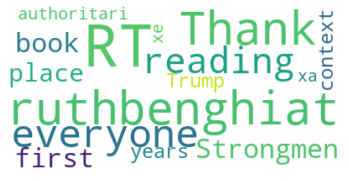

In [13]:
#we will start with a single review wordcloud at index 0
text_amazon =tweet_amazon.tweet_nostopwords_am[10]
wordcloud = WordCloud(background_color="white").generate(text_amazon)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
#now we combine all tweets into one big text and create a big fat cloud for better visualization
text_amazon = " ".join(tweet for tweet in tweet_amazon.tweet_nostopwords_am)
print ("There are {} words in the combination of all review.".format(len(text_amazon)))

There are 533742 words in the combination of all review.


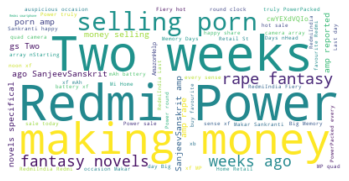

In [15]:
# Create stopword list, we can check the word cloud and customize the stop words further
stopwords = set(STOPWORDS)
stopwords.update(["b", "https", "amazon","co", "xe", "xa", "rt", "swati", "amazonin"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_amazon)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("D:/Python/amazon_tweets.png")

# Sentiment Analysis

# Step 1 : Get the polarity of tweets

In [15]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweet_amazon.tweet_nostopwords_am]

sentiment_objects[1].polarity

0.2

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

In [18]:
# Create dataframe containing the polarity value and tweet text
sentiment_amazon = pd.DataFrame(sentiment_values, columns=["Polarity", "Tweet"])

sentiment_amazon.head(25)

,Polarity,Tweet
0,0.500000,b RT toposant I played interesting Quiz Amazon...
1,0.200000,b Thanks quiz amazonIN n AmazonSpinandWin http...
2,0.500000,b I played interesting Quiz Amazon Play games ...
3,0.000000,b AmazonHelp amazon amazonIN JeffBezos aajtak ...
4,0.550000,b RT amazonIN Welcome latest appliances home a...
5,-0.200000,b The Silver Green The Chronicles Tonath Book ...
6,0.000000,b Check Furniture Hub Garden Bench Garden Benc...
7,0.000000,b RT NamitaA IFB Fack company fack working IFB...
8,0.000000,b IFB Fack company fack working IFBAppliances ...
9,-0.166667,b A Whisper Among Trees A Black Boy xe x x Bio...


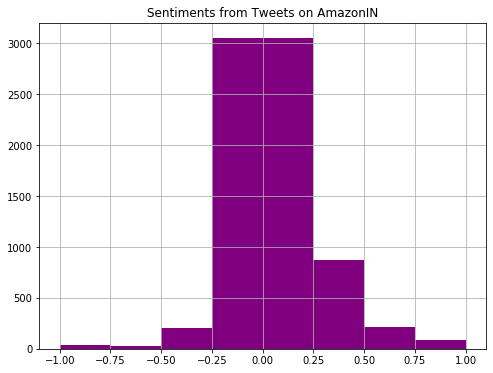

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_amazon.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on AmazonIN")
plt.show()

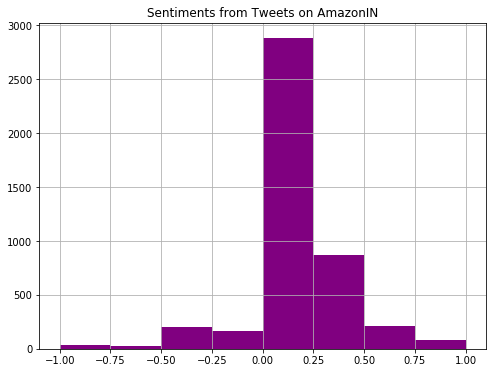

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_amazon.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on AmazonIN")
plt.show()

# Step 2 : Attach sentiment to the tweets

In [35]:
# assign reviews with ploarity > 0 as positive sentiment
# ploarity < 0 negative sentiment
# ploarity = 0 as nutral sentiment

sentiment_amazon['Sentiment'] = sentiment_amazon['Polarity'].apply(lambda rating : +1 if rating > 0 else (0  if rating == 0 else -1))

In [115]:
sentiment_amazon.head()

,Polarity,Tweet,Sentiment
0,0.50,b RT toposant I played interesting Quiz Amazon...,1
1,0.20,b Thanks quiz amazonIN n AmazonSpinandWin http...,1
2,0.50,b I played interesting Quiz Amazon Play games ...,1
3,0.00,b AmazonHelp amazon amazonIN JeffBezos aajtak ...,0
4,0.55,b RT amazonIN Welcome latest appliances home a...,1


# Step 3 : Classify sentiment into positive and negative

In [68]:
# split df - positive and negative sentiment:
positive = sentiment_amazon[sentiment_amazon['Sentiment'] == 1]
negative = sentiment_amazon[sentiment_amazon['Sentiment'] == -1]

# Step 4 : Word clouds for both sentiments

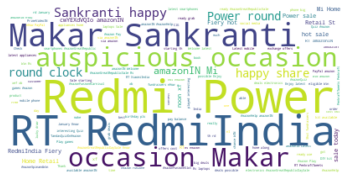

In [125]:
#word cloud for positive sentiment tweets

stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great", "xe", "xa", "https", "co"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Tweet)
wordcloud2 = WordCloud(stopwords=stopwords, background_color = "white").generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("D:/Python/amazon_postweets.png")

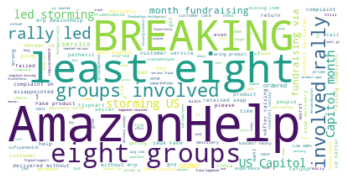

In [126]:
#word cloud for negative sentiment tweets

neg = " ".join(review for review in negative.Tweet)
stopwords.update(["br", "href","good","great", "xe", "xa", "https", "co", "amazonIN", "OD", "RT", "amazon"]) 
wordcloud3 = WordCloud(stopwords=stopwords, background_color = "white").generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

# Save the image in the img folder:
wordcloud.to_file("D:/Python/amazon_negtweets.png")

# Step 5 : Make insights from word clouds

# flipkart analytics

In [ ]:
#establish session for flipkart twitter
session.get('https://twitter.com/flipkart')

#define functions for twitter API access with 4 keys
#define functions for entering search term, tweets count
#save the text file into the drive as csv format
class SentimentAnalysis:

    def _init_(self):
        self.tweets = []
        self.tweetText = []

    def get_tweets(self):
        # authenticating    
        access_Token = "1350044109298405376-52CVQZ4GErdrZAghq0XJ3yZDao87sn"
        access_Token_secret = "SM9eixJDTdJlc42ggQkAdCnreHD9R5oS1yhtyDUtmTBsP"
        consumer_key = "PmA42ovQaEfjeMk6W22GdxhUv"
        consumer_secret = "e7f65xihnRNST0nYqfgMKXmmdqo5ZS1FWvOYI3IQCpqA67q15h"
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_Token, access_Token_secret)
        api = tweepy.API(auth,wait_on_rate_limit=True)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))
        
        print("\n\n")

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)
      
        # Open/create a file to append data to
        csvFile = open('flipkartindia_tweets.csv', 'a')

        #Use csv writer
        csvWriter = csv.writer(csvFile)

        for tweet in tweepy.Cursor(api.search,
                           q = searchTerm,
                           lang = "en").items(NoOfTerms):

        # Write a row to the CSV file. I use encode UTF-8
            csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
            print(tweet.created_at, tweet.text)
            
        csvFile.close()


if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.get_tweets()

In [3]:
#open the file
tweet_flipkart = pd.read_csv(r"flipkartindia_tweets.csv",header=None)

In [4]:
tweet_flipkart.head()

,0,1
0,2021-01-16 04:41:59,b'@jitenkparmar @Flipkart @Flipkart do look i...
1,2021-01-16 04:40:27,"b""And they have no proof of delivery. And @Fli..."
2,2021-01-16 04:40:27,b'Everything runs well for sometime with @flip...
3,2021-01-16 04:39:37,"b""RT @PankajY12000657: @Flipkart @flipkartsupp..."
4,2021-01-16 04:39:24,b'@Flipkart @flipkartsupport the new way of he...


In [129]:
tweet_flipkart.shape

(1019, 2)

In [5]:
#customize the columns
tweet_flipkart.columns = ['timestamp','tweet']

In [6]:
#remove special characters from tweets
tweet_flipkart['preprocess_tweet_fk'] = tweet_flipkart['tweet'].str.replace("[^a-zA-Z]+", " ")

In [7]:
tweet_flipkart.head()

,timestamp,tweet,preprocess_tweet_fk
0,2021-01-16 04:41:59,b'@jitenkparmar @Flipkart @Flipkart do look i...,b jitenkparmar Flipkart Flipkart do look its v...
1,2021-01-16 04:40:27,"b""And they have no proof of delivery. And @Fli...",b And they have no proof of delivery And Flipk...
2,2021-01-16 04:40:27,b'Everything runs well for sometime with @flip...,b Everything runs well for sometime with flipk...
3,2021-01-16 04:39:37,"b""RT @PankajY12000657: @Flipkart @flipkartsupp...",b RT PankajY Flipkart flipkartsupport the new ...
4,2021-01-16 04:39:24,b'@Flipkart @flipkartsupport the new way of he...,b Flipkart flipkartsupport the new way of help...


In [8]:
#Remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweet_flipkart['tweet_nostopwords_fk']= tweet_flipkart['preprocess_tweet_fk'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [9]:
tweet_flipkart.head()

,timestamp,tweet,preprocess_tweet_fk,tweet_nostopwords_fk
0,2021-01-16 04:41:59,b'@jitenkparmar @Flipkart @Flipkart do look i...,b jitenkparmar Flipkart Flipkart do look its v...,b jitenkparmar Flipkart Flipkart look shameful...
1,2021-01-16 04:40:27,"b""And they have no proof of delivery. And @Fli...",b And they have no proof of delivery And Flipk...,b And proof delivery And Flipkart believe cust...
2,2021-01-16 04:40:27,b'Everything runs well for sometime with @flip...,b Everything runs well for sometime with flipk...,b Everything runs well sometime flipkart sudde...
3,2021-01-16 04:39:37,"b""RT @PankajY12000657: @Flipkart @flipkartsupp...",b RT PankajY Flipkart flipkartsupport the new ...,b RT PankajY Flipkart flipkartsupport new way ...
4,2021-01-16 04:39:24,b'@Flipkart @flipkartsupport the new way of he...,b Flipkart flipkartsupport the new way of help...,b Flipkart flipkartsupport new way helping cus...


# Demo word cloud

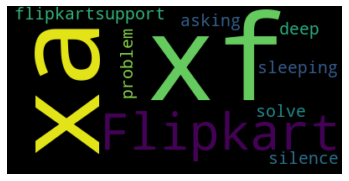

In [50]:
#preparations for wordcloud visulaization

#we will start with a single review wordcloud at index 0
text_flipkart =tweet_flipkart.tweet_nostopwords_fk[10]
wordcloud = WordCloud().generate(text_flipkart)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
#So now you'll combine all tweets into one big text and create a big fat cloud to see which are most common in these tweets
text_flipkart = " ".join(tweet for tweet in tweet_flipkart.tweet_nostopwords_fk)
print ("There are {} words in the combination of all review.".format(len(text_flipkart)))

There are 110930 words in the combination of all review.


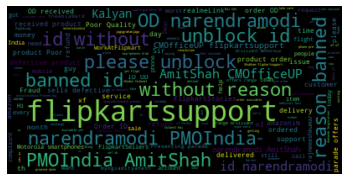

In [11]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["b", "https", "flipkart","co", "xe", "xa", "rt", "swati"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text_flipkart)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("D:/Python/flipkart_tweets.png")

# Sentiment Analysis

# Step 1 : Get the polarity of tweets

In [13]:
# Create textblob objects of the tweets
sentiment_objects_fk = [TextBlob(tweet) for tweet in tweet_flipkart.tweet_nostopwords_fk]

sentiment_objects_fk[1].polarity

0.0

In [14]:
# Create list of polarity valuesx and tweet text
sentiment_values_fk = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects_fk]

In [15]:
# Create dataframe containing the polarity value and tweet text
sentiment_flipkart = pd.DataFrame(sentiment_values_fk, columns=["Polarity", "Tweet"])

sentiment_flipkart.head(10)

,Polarity,Tweet
0,0.600000,b jitenkparmar Flipkart Flipkart look shameful...
1,0.000000,b And proof delivery And Flipkart believe cust...
2,0.000000,b Everything runs well sometime flipkart sudde...
3,0.136364,b RT PankajY Flipkart flipkartsupport new way ...
4,0.136364,b Flipkart flipkartsupport new way helping cus...
5,0.066667,b apunAdarsh RoshanXingh Flipkart Fuck Flipkar...
6,0.000000,b Flipkart flipkartsupport nReminder No nWorst...
7,0.000000,b RT Saavadhani AlligatorrCamp Flipkart Air Ti...
8,0.000000,b Infinix offering SNOKOR iRocker earbuds Rs i...
9,0.000000,b RT PankajY Flipkart flipkartsupport u sleepi...


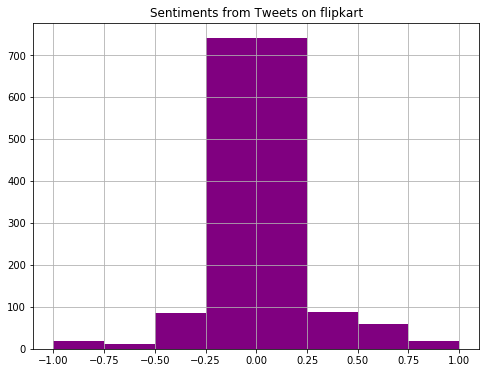

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_flipkart.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on flipkart")
plt.show()

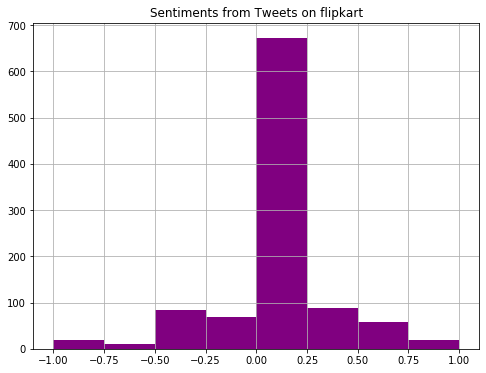

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_flipkart.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on flipkart")
plt.show()

# Step 2 : Attach sentiment to the tweets

In [16]:
# assign reviews with ploarity > 0 as positive sentiment
# ploarity < 0 negative sentiment
# ploarity = 0 as nutral sentiment

sentiment_flipkart['Sentiment'] = sentiment_flipkart['Polarity'].apply(lambda rating : +1 if rating > 0 else (0  if rating == 0 else -1))

In [17]:
sentiment_flipkart.head()

,Polarity,Tweet,Sentiment
0,0.600000,b jitenkparmar Flipkart Flipkart look shameful...,1
1,0.000000,b And proof delivery And Flipkart believe cust...,0
2,0.000000,b Everything runs well sometime flipkart sudde...,0
3,0.136364,b RT PankajY Flipkart flipkartsupport new way ...,1
4,0.136364,b Flipkart flipkartsupport new way helping cus...,1


# Step 3 : Classify sentiment into positive and negative

In [18]:
# split df - positive and negative sentiment:
positive_fk = sentiment_flipkart[sentiment_flipkart['Sentiment'] == 1]
negative_fk = sentiment_flipkart[sentiment_flipkart['Sentiment'] == -1]

# Step 4 : Word clouds for both sentiments

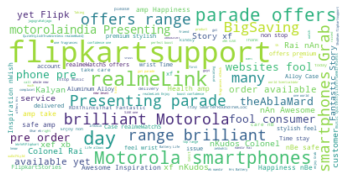

In [23]:
#word cloud for positive sentiment tweets
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great", "xe", "xa", "https", "co", "flipkart", "RT"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive_fk.Tweet)
wordcloud2 = WordCloud(stopwords=stopwords, background_color = "white").generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

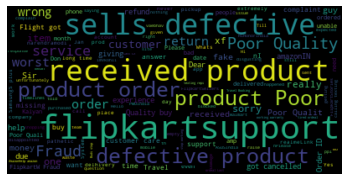

In [25]:
#word cloud for negative sentiment tweets
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great", "xe", "xa", "https", "co", "flipkart", "RT", "OD"]) 
neg = " ".join(review for review in negative_fk.Tweet)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

# Step 5 : Make insights from word clouds

# Snapdeal analytics

In [ ]:
#establish session with snapdeal twitter
session.get('https://twitter.com/snapdeal')

#define functions for twitter API access with 4 keys
#define functions for entering search term, tweets count
#save the text file into the drive as csv format
class SentimentAnalysis:

    def _init_(self):
        self.tweets = []
        self.tweetText = []

    def get_tweets(self):
        # authenticating    
        access_Token = "1350044109298405376-52CVQZ4GErdrZAghq0XJ3yZDao87sn"
        access_Token_secret = "SM9eixJDTdJlc42ggQkAdCnreHD9R5oS1yhtyDUtmTBsP"
        consumer_key = "PmA42ovQaEfjeMk6W22GdxhUv"
        consumer_secret = "e7f65xihnRNST0nYqfgMKXmmdqo5ZS1FWvOYI3IQCpqA67q15h"
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_Token, access_Token_secret)
        api = tweepy.API(auth,wait_on_rate_limit=True)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))
        
        print("\n\n")

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)
      
        # Open/create a file to append data to
        csvFile = open('snapdeal_tweets.csv', 'a')

        #Use csv writer
        csvWriter = csv.writer(csvFile)

        for tweet in tweepy.Cursor(api.search,
                           q = searchTerm,
                           lang = "en").items(NoOfTerms):

        # Write a row to the CSV file. I use encode UTF-8
            csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
            print(tweet.created_at, tweet.text)
            
        csvFile.close()


if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.get_tweets()

In [26]:
#open the file
tweet_snapdeal = pd.read_csv(r"snapdeal_tweets.csv",header=None, encoding='cp1252')

In [27]:
tweet_snapdeal.head()

,0,1
0,2021-01-16 05:11:39,"b"".@snapdeal terms @USTradeRep report placing ..."
1,2021-01-16 04:49:56,b'Office of the #UnitedStates Trade Representa...
2,2021-01-16 04:29:58,b'@snapdeal seller is a cheater company only s...
3,2021-01-15 17:41:00,b'@snapdeal\n1.orderd jacket on 27th dec\n2. 1...
4,2021-01-15 17:37:39,b'The 2020 Review of #Notorious #Markets for #...


In [28]:
tweet_snapdeal.shape

(1495, 2)

In [29]:
#customize the columns
tweet_snapdeal.columns = ['timestamp','tweet']

In [30]:
tweet_snapdeal.head()

,timestamp,tweet
0,2021-01-16 05:11:39,"b"".@snapdeal terms @USTradeRep report placing ..."
1,2021-01-16 04:49:56,b'Office of the #UnitedStates Trade Representa...
2,2021-01-16 04:29:58,b'@snapdeal seller is a cheater company only s...
3,2021-01-15 17:41:00,b'@snapdeal\n1.orderd jacket on 27th dec\n2. 1...
4,2021-01-15 17:37:39,b'The 2020 Review of #Notorious #Markets for #...


In [31]:
#remove special characters from tweets
tweet_snapdeal ['preprocess_tweet'] = tweet_snapdeal['tweet'].str.replace("[^a-zA-Z]+", " ")

In [32]:
tweet_snapdeal.head()

,timestamp,tweet,preprocess_tweet
0,2021-01-16 05:11:39,"b"".@snapdeal terms @USTradeRep report placing ...",b snapdeal terms USTradeRep report placing it ...
1,2021-01-16 04:49:56,b'Office of the #UnitedStates Trade Representa...,b Office of the UnitedStates Trade Representat...
2,2021-01-16 04:29:58,b'@snapdeal seller is a cheater company only s...,b snapdeal seller is a cheater company only su...
3,2021-01-15 17:41:00,b'@snapdeal\n1.orderd jacket on 27th dec\n2. 1...,b snapdeal n orderd jacket on th dec n st jan ...
4,2021-01-15 17:37:39,b'The 2020 Review of #Notorious #Markets for #...,b The Review of Notorious Markets for Counterf...


In [33]:
#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweet_snapdeal['tweet_nostopwords_sd']= tweet_snapdeal['preprocess_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [34]:
tweet_snapdeal.head()

,timestamp,tweet,preprocess_tweet,tweet_nostopwords_sd
0,2021-01-16 05:11:39,"b"".@snapdeal terms @USTradeRep report placing ...",b snapdeal terms USTradeRep report placing it ...,b snapdeal terms USTradeRep report placing Not...
1,2021-01-16 04:49:56,b'Office of the #UnitedStates Trade Representa...,b Office of the UnitedStates Trade Representat...,b Office UnitedStates Trade Representative pla...
2,2021-01-16 04:29:58,b'@snapdeal seller is a cheater company only s...,b snapdeal seller is a cheater company only su...,b snapdeal seller cheater company support cust...
3,2021-01-15 17:41:00,b'@snapdeal\n1.orderd jacket on 27th dec\n2. 1...,b snapdeal n orderd jacket on th dec n st jan ...,b snapdeal n orderd jacket th dec n st jan app...
4,2021-01-15 17:37:39,b'The 2020 Review of #Notorious #Markets for #...,b The Review of Notorious Markets for Counterf...,b The Review Notorious Markets Counterfeiting ...


# Demo word cloud

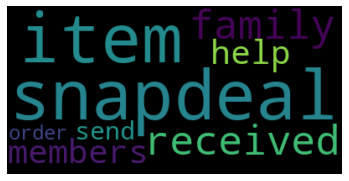

In [35]:
#sample word cloud on a tweet at specific index
text_snapdeal =tweet_snapdeal.tweet_nostopwords_sd[10]
wordcloud = WordCloud().generate(text_snapdeal)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
#So now you'll combine all tweets into one big text and create a big fat cloud to see which are most common in these tweets
text_snapdeal = " ".join(tweet for tweet in tweet_snapdeal.tweet_nostopwords_sd)
print ("There are {} words in the combination of all review.".format(len(text_snapdeal)))

There are 177841 words in the combination of all review.


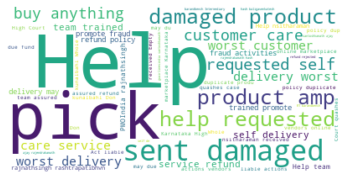

In [37]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["b", "https", "xe", "xa", "snapdeal","co"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_snapdeal)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("D:/Python/snapdeal_tweets.png")

# Sentiment Analysis

# Step 1 : Get the polarity of tweets

In [38]:
# Create textblob objects of the tweets
sentiment_objects_sd = [TextBlob(tweet) for tweet in tweet_snapdeal.tweet_nostopwords_sd]

sentiment_objects_sd[1].polarity

0.0

In [39]:
# Create list of polarity valuesx and tweet text
sentiment_values_sd = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects_sd]

In [40]:
# Create dataframe containing the polarity value and tweet text
sentiment_snapdeal = pd.DataFrame(sentiment_values_sd, columns=["Polarity", "Tweet"])

sentiment_snapdeal.head(25)

,Polarity,Tweet
0,-0.500000,b snapdeal terms USTradeRep report placing Not...
1,0.000000,b Office UnitedStates Trade Representative pla...
2,0.375000,b snapdeal seller cheater company support cust...
3,0.000000,b snapdeal n orderd jacket th dec n st jan app...
4,0.000000,b The Review Notorious Markets Counterfeiting ...
5,0.000000,b Snapdeal xe x x extensive reach smaller citi...
6,-0.390000,b Very slow delivery system snapdeal items
7,0.200000,b Whole snapdeal team trained promote fraud ac...
8,0.200000,b Whole snapdeal team trained promote fraud ac...
9,0.200000,b Whole snapdeal team trained promote fraud ac...


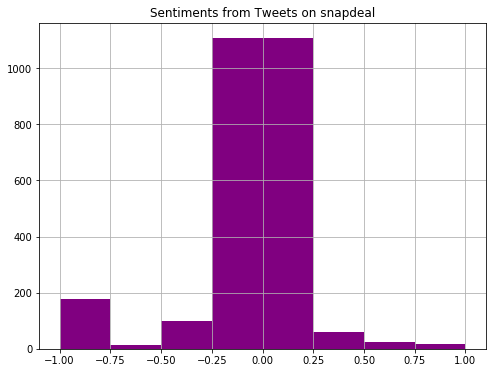

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_snapdeal.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on snapdeal")
plt.show()

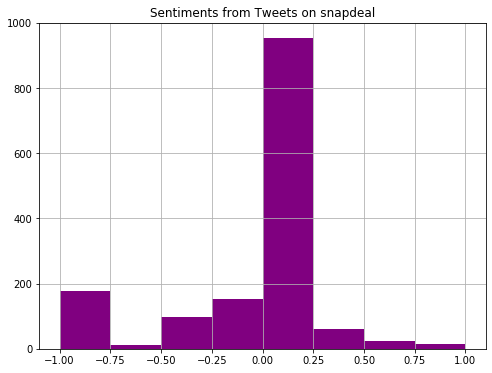

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_snapdeal.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on snapdeal")
plt.show()

In [90]:
sentiment_snapdeal.head()

,Polarity,Tweet
0,-0.500,b snapdeal terms USTradeRep report placing Not...
1,0.000,b Office UnitedStates Trade Representative pla...
2,0.375,b snapdeal seller cheater company support cust...
3,0.000,b snapdeal n orderd jacket th dec n st jan app...
4,0.000,b The Review Notorious Markets Counterfeiting ...


# Step 2 : Attach sentiment to the tweets

In [41]:
# assign reviews with ploarity > 0 as positive sentiment
# ploarity < 0 negative sentiment
# ploarity = 0 as nutral sentiment

sentiment_snapdeal['Sentiment'] = sentiment_snapdeal['Polarity'].apply(lambda rating : +1 if rating > 0 else (0  if rating == 0 else -1))

# Step 3 : Classify sentiment into positive and negative

In [42]:
# split df - positive and negative sentiment:
positive_sd = sentiment_snapdeal[sentiment_snapdeal['Sentiment'] == 1]
negative_sd = sentiment_snapdeal[sentiment_snapdeal['Sentiment'] == -1]

# Step 4 : Word clouds for both sentiments

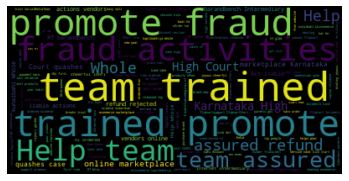

In [43]:
#word cloud for positive sentiment tweets
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great", "xe", "xa", "https", "co", "snapdeal"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive_sd.Tweet)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

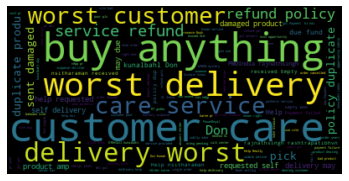

In [96]:
#word cloud for negative sentiment tweets
neg = " ".join(review for review in negative_sd.Tweet)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

# Step 5 : Make insights from word clouds

# End of the task